In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import sys
sys.path.insert(0, '../scvi-tools/src')

In [4]:
import scvi
import pandas as pd
from ppc_plot_utils import PPCPlot

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndat

In [5]:
scvi.__file__

'/home/cane/Documents/scvi-tools/src/scvi/__init__.py'

In [6]:
from scvi.hub import HubModel

In [7]:
hmo = HubModel.pull_from_huggingface_hub(
    repo_name="scvi-tools/haniffa_covid_pbmc_totalvi",
    cache_dir=".",
    revision="main",
)

Fetching 3 files: 100%|██████████| 3/3 [00:00<00:00, 16070.13it/s]


In [8]:
model = hmo.model

INFO     Loading model...                                                                                          
INFO     File                                                                                                      
         ./models--scvi-tools--haniffa_covid_pbmc_totalvi/snapshots/c02c8832c258089e8724e65d0c471f96ddffa75a/model.
         pt already downloaded                                                                                     


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


INFO     Found batches with missing protein expression                                                             
INFO     Found batches with missing protein expression                                                             


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:136: UserWarning: Some proteins have all 0 counts in some batches. These proteins will be treated as missing measurements; however, this can occur due to experimental design/biology. Reinitialize the model with `override_missing_proteins=True`,to override this behavior.
  model = cls(adata, **non_kwargs, **kwargs)


In [9]:
import mudata

large_data = hmo.large_training_adata
large_data

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 647366 × 4192
  2 modalities
    rna:	647366 x 4000
      obs:	'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'initial_clustering', 'Resample', 'Collection_Day', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'donor_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'author_cell_type', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
      var:	'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
      uns:	'citation', 'default_embedding', 'hvg', 'leiden', 'pca', 'schema_reference', 'schema_version', 'title', 'umap'
      obsm:	'X_pca', 'X_pca_harmony', 'X_umap'
      layers:	'counts'
    protein:	647366 x 192
      obs:	'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'initial_clustering', 'Resample', 'Collection_Day', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'donor_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'author_cell_type', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
      var:	'antibody_features'

In [10]:
mdata = model.adata

In [11]:
import scanpy as sc

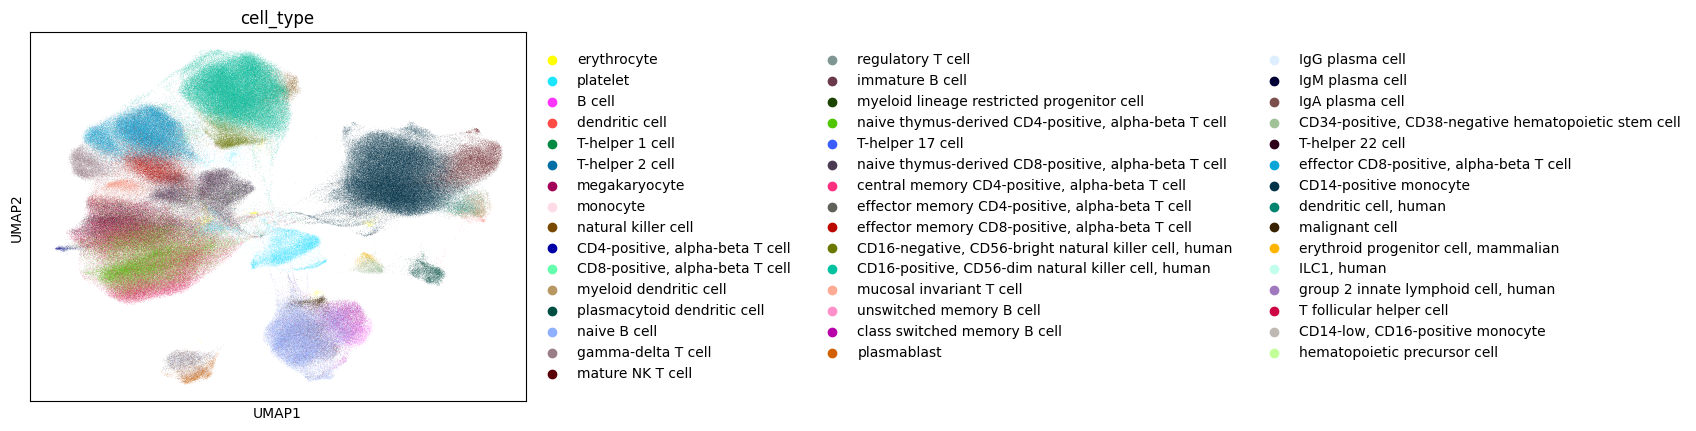

In [11]:
mdata.obsm['X_totalvi'] = model.get_latent_representation()
sc.pp.neighbors(mdata, use_rep='X_totalvi')
sc.tl.umap(mdata)
mdata['rna'].obsm['X_umap'] = mdata.obsm['X_umap']
sc.pl.umap(mdata['rna'], color='cell_type')

In [38]:
import matplotlib.pyplot as plt

sc.set_figure_params(vector_friendly=True, dpi_save=300, fontsize=14)

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.unicode_minus'] = True

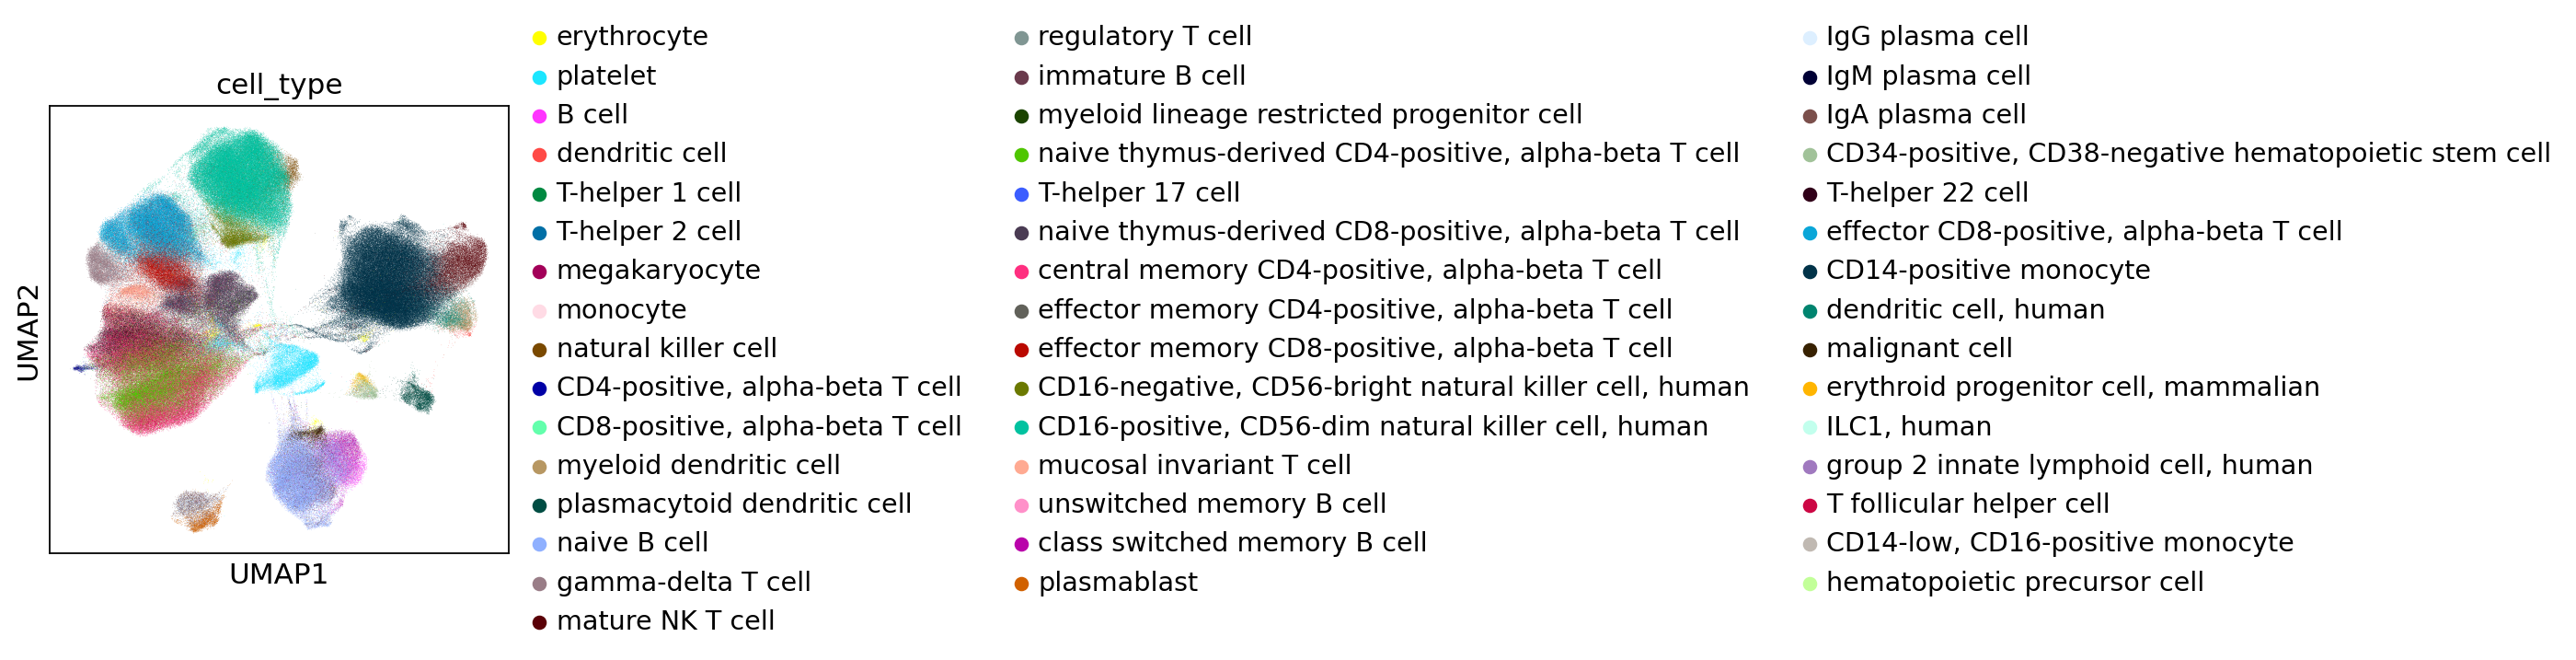

In [39]:
sc.pl.umap(mdata['rna'], color='cell_type', save='covid_umap.svg')

In [14]:
mdata.write_h5mu('covid_output.h5mu')

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [13]:
import mudata

mdata = mudata.read_h5mu('covid_output.h5mu')

/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/cane/.local/share/hatch/env/virtual/scvi-tools/eVVa01t5/scvi-tools/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [14]:
from ppc_plot_utils import PPCPlot

In [15]:
from scvi.criticism import PosteriorPredictiveCheck as PPC

In [18]:
large_data = mdata

In [17]:
temp_fig_dir = "temp_figs"
import matplotlib.pyplot as plt

In [21]:
model.save('covid_model')

In [22]:
loaded_model = model.load('covid_model', adata=large_data)

INFO     File covid_model/model.pt already downloaded                                                              


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

/home/cane/Documents/scvi-tools/src/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


INFO     Found batches with missing protein expression                                                             
INFO     Found batches with missing protein expression                                                             


/home/cane/Documents/scvi-tools/src/scvi/model/base/_save_load.py:136: UserWarning: Some proteins have all 0 counts in some batches. These proteins will be treated as missing measurements; however, this can occur due to experimental design/biology. Reinitialize the model with `override_missing_proteins=True`,to override this behavior.
  model = cls(adata, **non_kwargs, **kwargs)


INFO     Computing empirical prior initialization for protein background.                                          


In [ ]:
models_dict = {"TOTALVI": loaded_model}
ppc = PPC(large_data, models_dict, n_samples=2, modality='protein')

model=TOTALVI | metric=cv_cell | n_cells=647366:
Mean Absolute Error=0.33 Validation 0.33,
Pearson correlation=0.51 Validation 0.51,
Spearman correlation=0.76 Validation 0.76,
R^2=-1.36 Validation -1.29,



TOTALVI    1.400346
Raw        1.299423
dtype: float32

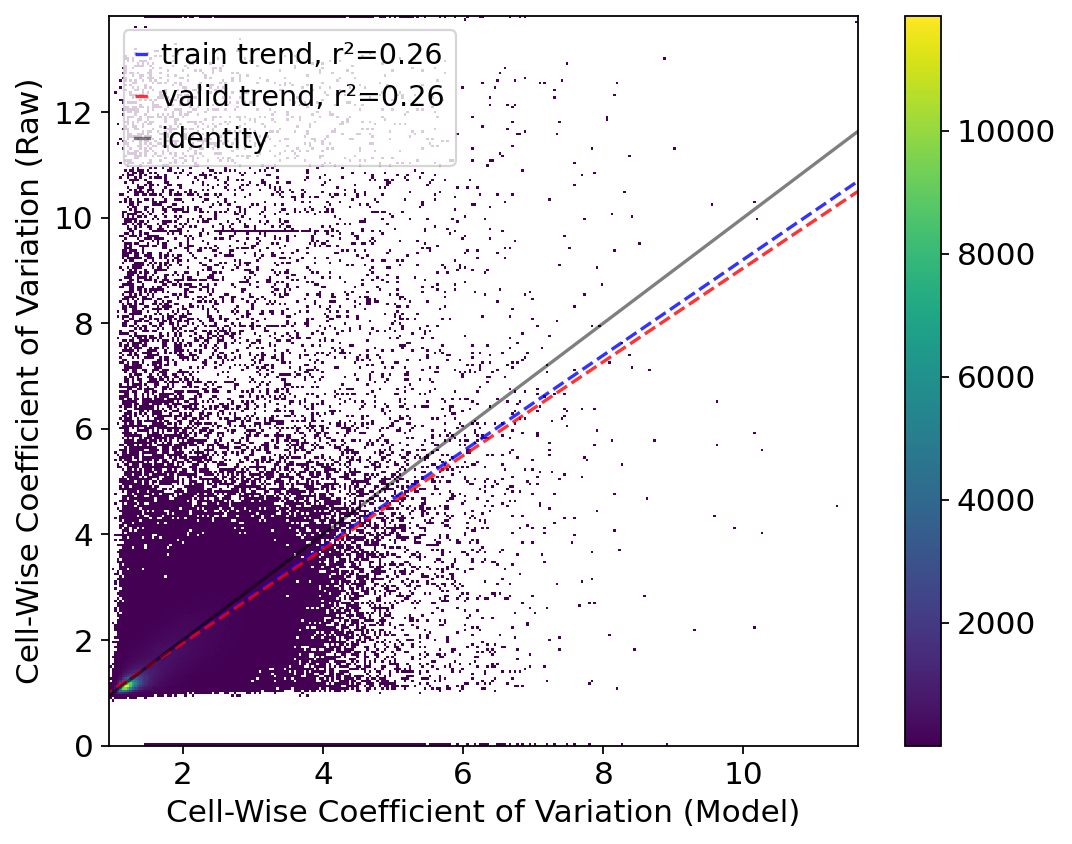

In [40]:
ppc.coefficient_of_variation("features")
pd.options.display.max_rows = 999
ppc_plt = PPCPlot(ppc)

ppc_plt.plot_cv(model=loaded_model, model_name="TOTALVI", cell_wise=True, plt_type="hist2d")

fig_path = f'{temp_fig_dir}/ppc_cv_cell_protein.svg'
plt.savefig(fig_path, dpi=600, bbox_inches="tight")
ppc.metrics['cv_cell'].median()

model=TOTALVI | metric=cv_gene | n_cells=647366:
Mean Absolute Error=4.28,
Pearson correlation=0.44,
Spearman correlation=0.73,
R^2=-6.19,



TOTALVI    2.167164
Raw        4.036442
dtype: float32

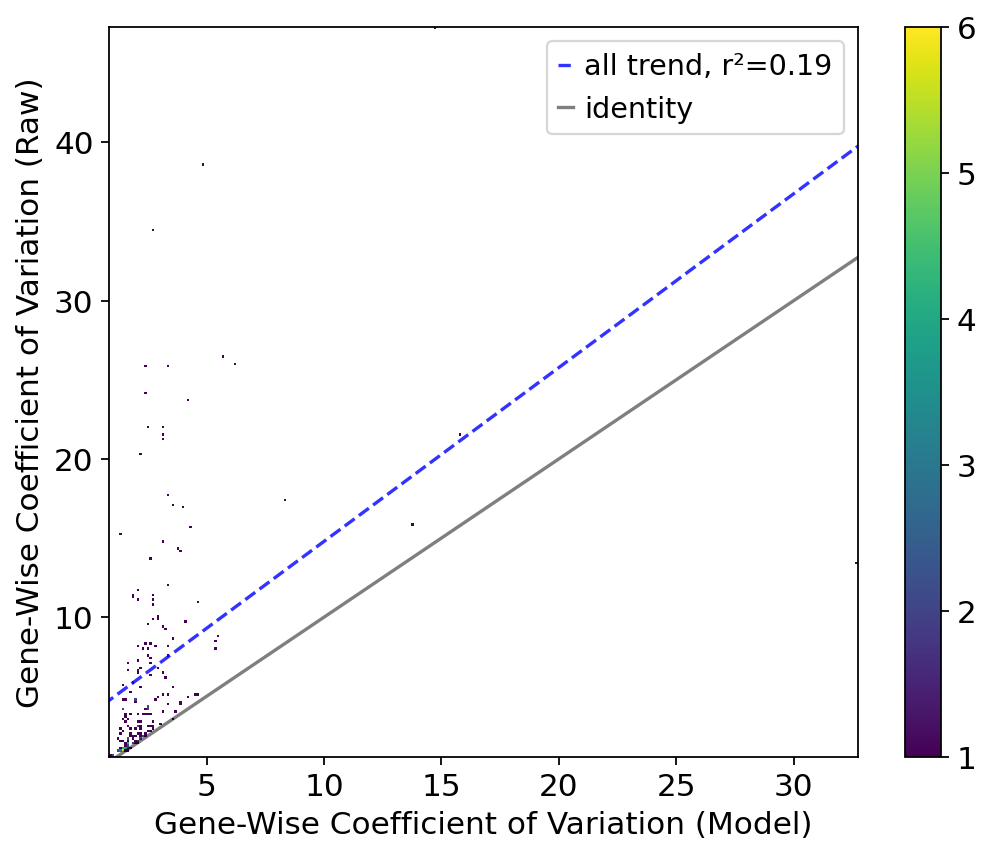

In [41]:
ppc.coefficient_of_variation("cells")
pd.options.display.max_rows = 999
ppc_plt = PPCPlot(ppc)

ppc_plt.plot_cv(model=loaded_model, model_name="TOTALVI", cell_wise=False, plt_type="hist2d")

fig_path = f'{temp_fig_dir}/ppc_cv_gene_protein.svg'
plt.savefig(fig_path, dpi=600, bbox_inches="tight")
ppc.metrics['cv_gene'].median()

In [ ]:
ppc_rna = PPC(large_data, models_dict, n_samples=2, modality='rna')

model=TOTALVI | metric=cv_cell | n_cells=647366:
Mean Absolute Error=0.57 Validation 0.57,
Pearson correlation=0.73 Validation 0.72,
Spearman correlation=0.82 Validation 0.82,
R^2=-0.09 Validation -0.08,



/home/cane/Documents/scvi-tools/scvi-hub-models/ppc_plot_utils.py:151: RankWarning: Polyfit may be poorly conditioned
  a, b = np.polyfit(model_metric[ind], raw_metric[ind], 1)


TOTALVI    1.400346
Raw        1.299423
dtype: float32

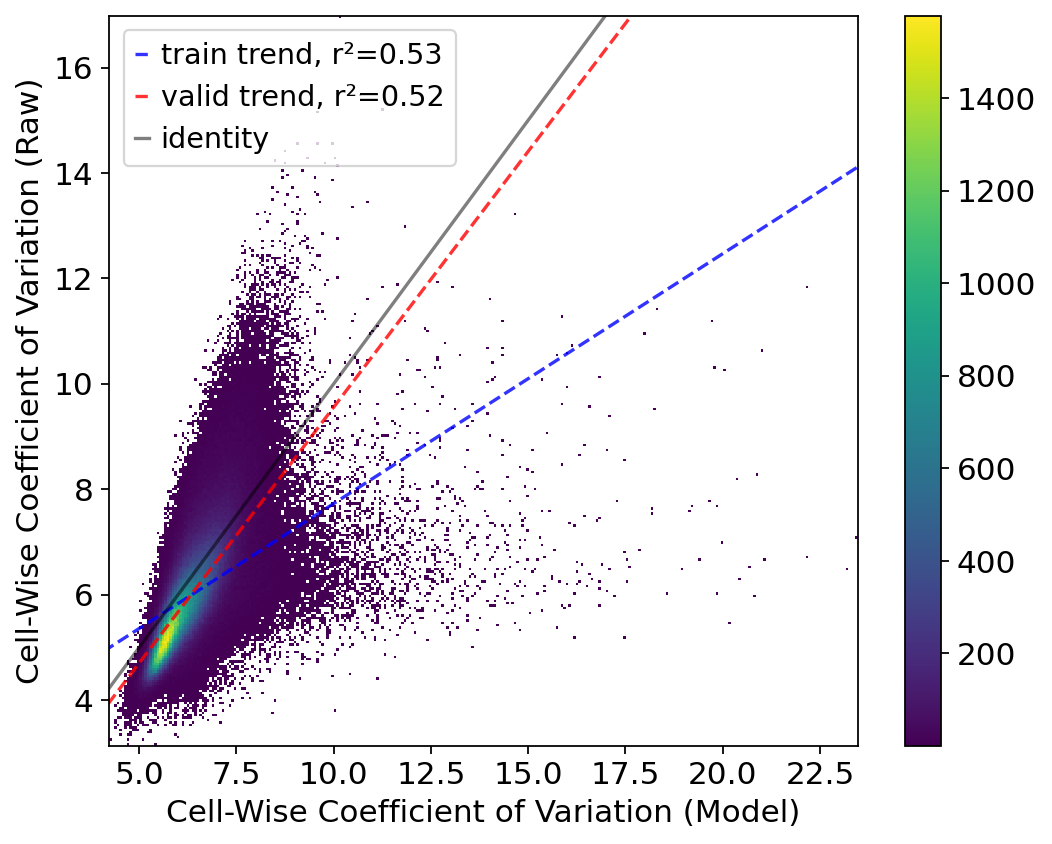

In [42]:
ppc_rna.coefficient_of_variation("features")
pd.options.display.max_rows = 999
ppc_plt = PPCPlot(ppc_rna)
ppc_plt.plot_cv(model=model, model_name="TOTALVI", cell_wise=True, plt_type="hist2d")

fig_path = f'{temp_fig_dir}/ppc_cv_cell_rna.svg'
plt.savefig(fig_path, dpi=600, bbox_inches="tight")
ppc.metrics['cv_cell'].median()

model=TOTALVI | metric=cv_gene | n_cells=647366:
Mean Absolute Error=26.98,
Pearson correlation=0.94,
Spearman correlation=0.99,
R^2=-0.26,



TOTALVI    1.400346
Raw        1.299423
dtype: float32

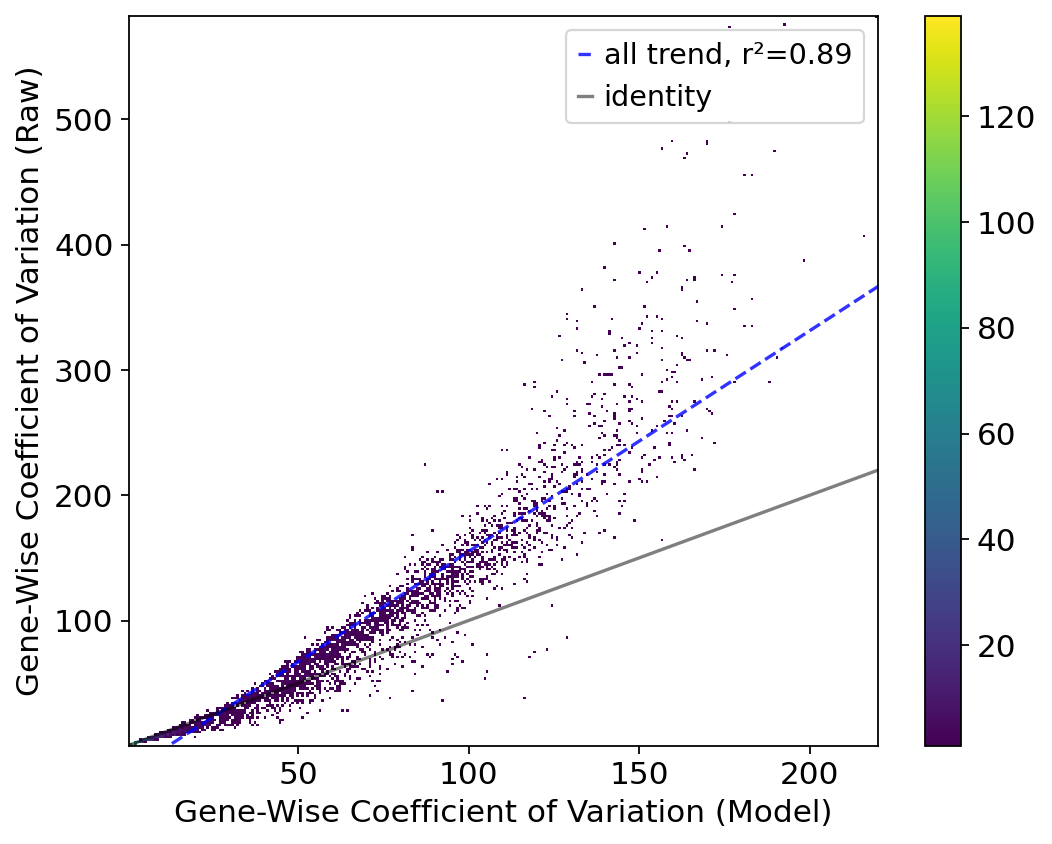

In [43]:
ppc_rna.coefficient_of_variation("cells")
pd.options.display.max_rows = 999
ppc_plt = PPCPlot(ppc_rna)
ppc_plt.plot_cv(model=model, model_name="TOTALVI", cell_wise=False, plt_type="hist2d")

fig_path = f'{temp_fig_dir}/ppc_cv_gene_rna.svg'
plt.savefig(fig_path, dpi=600, bbox_inches="tight")
ppc.metrics['cv_cell'].median()

In [45]:
mdata['rna'].obs['cell_type'].cat.categories

Index(['erythrocyte', 'platelet', 'B cell', 'dendritic cell',
       'T-helper 1 cell', 'T-helper 2 cell', 'megakaryocyte', 'monocyte',
       'natural killer cell', 'CD4-positive, alpha-beta T cell',
       'CD8-positive, alpha-beta T cell', 'myeloid dendritic cell',
       'plasmacytoid dendritic cell', 'naive B cell', 'gamma-delta T cell',
       'mature NK T cell', 'regulatory T cell', 'immature B cell',
       'myeloid lineage restricted progenitor cell',
       'naive thymus-derived CD4-positive, alpha-beta T cell',
       'T-helper 17 cell',
       'naive thymus-derived CD8-positive, alpha-beta T cell',
       'central memory CD4-positive, alpha-beta T cell',
       'effector memory CD4-positive, alpha-beta T cell',
       'effector memory CD8-positive, alpha-beta T cell',
       'CD16-negative, CD56-bright natural killer cell, human',
       'CD16-positive, CD56-dim natural killer cell, human',
       'mucosal invariant T cell', 'unswitched memory B cell',
       'class switche